## **Захарова Екатерина Дмитриевна** _вариант 4_

## **Лабораторная работа № 3**
### Текст задания:
1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.


In [1]:
import pandas as pd
house_df = pd.read_csv('kc_house_data.csv')
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

* **id** - Уникальный идентификатор для каждого проданного дома.
* **date** - Дата продажи дома.
* **price** - Цена каждого проданного дома.
* **bedrooms** - Количество спален.
* **bathrooms** - Количество ванных комнат, где 5 - комната с туалетом, но без душа.
* **sqft_living** - Площадь внутренней жилой площади квартир (Квадратные метры).
* **sqft_lot** - Площадь земельного участка (Квадратные метры).
* **floors** - Количество этажей.
* **waterfront** - Фиктивная переменная для того, выходили ли окна квартиры на набережную или нет.
* **view** - Индекс (от 0 до 4) того, насколько хорошим был вид из окна.
* **condition** - Индекс (от 1 до 5) сосстояния квартиры.
* **grade** - показатель (от 1 до 13), где 1-3 - плохой уровень строительства и проектирования зданий, 7 - имеют средний уровень строительства и проектирования, а 11-13 - имеют высокий уровень качества строительства и проектирования.
* **sqft_above** - Площадь внутреннего пространства, находящегося над уровнем земли (Квадратные метры).
* **sqft_basement** - Площадь внутреннего жилого пространсва, находящегося ниже уровня земли (Квадратные метры).
* **yr_built** - Год, когда дом был первоначально построен.
* **yr_renovated** - Год последнего ремонта дома.
* **zipcode** - Почтовый индекс территории, на которой находится дом.
* **lat** - Широта.
* **long** - Долгота.
* **sqft_living15** - Площадь межкомнатного пространства жилплощади до близжайших 15 соседей.
* **sqft_lot15** - Площадь земельных участков до близжайших 15 соседей.

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [2]:
print("Количество строк до удаления дубликатов: ", len(house_df.index))
house_df.drop_duplicates(keep = 'first', inplace = True)
print("Количество строк после удаления дубликатов: ", len(house_df.index))

Количество строк до удаления дубликатов:  21613
Количество строк после удаления дубликатов:  21613


### 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

Диаграмма до масштабирования:

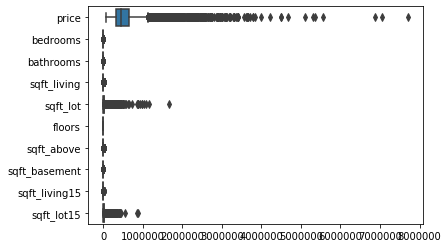

In [3]:
import seaborn as sn
from sklearn import preprocessing

sn.boxplot(data=house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']], orient = 'h')

Выполнение стандартизации

In [4]:
scaler = preprocessing.MinMaxScaler()
house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]= scaler.fit_transform(house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']].values.astype(float))

Диаграмма после масштабирования

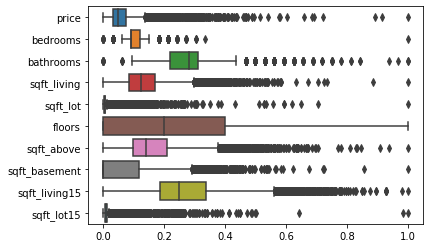

In [5]:
sn.boxplot(data=house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']], orient = 'h')

### 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

Dummy - кодировка

In [6]:
def dummy_code(data, feature):
    for i in data[feature].unique():
        data[feature + ' = ' + str(i)] = (data[feature] == i).astype(float)

dummy_code(house_df, 'view')
house_df.drop(['view'], axis='columns', inplace=True)
house_df = house_df[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'view = 0', 'view = 1', 'view = 2', 'view = 3', 'view = 4']]
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,view = 0,view = 1,view = 2,view = 3,view = 4
0,7129300520,20141013T000000,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0,3,...,98178,47.5112,-122.257,0.161934,0.005742,1.0,0.0,0.0,0.0,0.0
1,6414100192,20141209T000000,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0,3,...,98125,47.7210,-122.319,0.222165,0.008027,1.0,0.0,0.0,0.0,0.0
2,5631500400,20150225T000000,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0,3,...,98028,47.7379,-122.233,0.399415,0.008513,1.0,0.0,0.0,0.0,0.0
3,2487200875,20141209T000000,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0,5,...,98136,47.5208,-122.393,0.165376,0.004996,1.0,0.0,0.0,0.0,0.0
4,1954400510,20150218T000000,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0,3,...,98074,47.6168,-122.045,0.241094,0.007871,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,0.037377,0.090909,0.31250,0.093585,0.000370,0.8,0,3,...,98103,47.6993,-122.346,0.194631,0.000986,1.0,0.0,0.0,0.0,0.0
21609,6600060120,20150223T000000,0.042623,0.121212,0.31250,0.152453,0.003206,0.4,0,3,...,98146,47.5107,-122.362,0.246257,0.007523,1.0,0.0,0.0,0.0,0.0
21610,1523300141,20140623T000000,0.042898,0.060606,0.09375,0.055094,0.000503,0.4,0,3,...,98144,47.5944,-122.299,0.106866,0.001558,1.0,0.0,0.0,0.0,0.0
21611,291310100,20150116T000000,0.042623,0.090909,0.31250,0.098868,0.001132,0.4,0,3,...,98027,47.5345,-122.069,0.173980,0.000731,1.0,0.0,0.0,0.0,0.0


### 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;

In [7]:
house_corr_df = house_df.corr()
house_corr_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,view = 0,view = 1,view = 2,view = 3,view = 4
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,-0.023783,0.008130,...,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.011405,0.001639,0.014570,-0.012649,0.017476
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.036362,0.667434,...,-0.053203,0.307003,0.021626,0.585379,0.082447,-0.359120,0.092607,0.148418,0.182880,0.307932
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.028472,0.356967,...,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.080106,0.022200,0.045060,0.050431,0.034531
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,-0.124982,0.664983,...,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.177145,0.038054,0.087204,0.112296,0.107931
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,-0.058753,0.762704,...,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.270907,0.066511,0.135285,0.158885,0.169460
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,-0.008958,0.113621,...,-0.129574,-0.085683,0.229521,0.144608,0.718557,-0.067847,-0.008287,0.037278,0.073871,0.019172
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,-0.263768,0.458183,...,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.017871,-0.022721,0.009751,0.020267,0.025094
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.016653,0.082775,...,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.264057,-0.006540,0.001911,0.053391,0.588042
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,1.000000,-0.144674,...,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.047143,0.019697,0.027127,0.016016,0.029712
grade,0.008130,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,-0.144674,1.000000,...,-0.184862,0.114084,0.198372,0.713202,0.119248,-0.237327,0.048944,0.121990,0.142368,0.148018


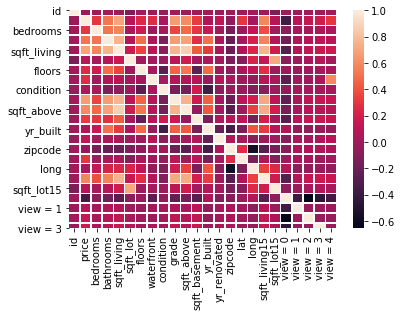

In [8]:
sn.heatmap(house_corr_df, fmt = '.1f', linewidths = .5)

### 6. Заполните пропущенные значения в данных;

In [9]:
house_df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
view = 0         21613
view = 1         21613
view = 2         21613
view = 3         21613
view = 4         21613
dtype: int64

Пропущенные значения в данном наборе данных отсутствуют.

### 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

***Линейная регрессия без использования регуляризаторов***

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

house_df.drop(['date'], axis=1, inplace = True)
data_x, data_y = house_df.drop(['price'], axis=1), house_df['price']
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size = 0.3, random_state = 123)

reg = LinearRegression()
reg.fit(train_x, train_y)
pred_reg = reg.predict(test_x)
print(pred_reg[:15] - test_y[:15])

c:\users\kati\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


5506     0.014055
9279     0.008217
16034    0.019951
6608     0.030725
20359   -0.006001
8798     0.010267
10035   -0.007529
13321    0.025485
15842    0.025075
12119    0.022672
1799    -0.009756
15078   -0.019532
19275   -0.017994
4699     0.006785
4762    -0.026372
Name: price, dtype: float64


In [11]:
from scipy.stats import pearsonr, spearmanr

pearson, pearson_p_value = pearsonr(pred_reg, test_y)
spearman, spearman_p_value = spearmanr(pred_reg, test_y)
print("Коэффициент Пирсона: ", pearson, "\nКоэффициент Спримена: ", spearman)

if pearson_p_value < 0.05 and spearman_p_value < 0.05:
    print('p-value is good')
else:
    print('p-value is not good')

Коэффициент Пирсона:  0.8435012637560713 
Коэффициент Спримена:  0.8574818044734654
p-value is good


***Линейная регрессия, LASSO регуляризатор***

In [12]:
import numpy as np
from sklearn.linear_model import Lasso

lasso = Lasso()
params = {'alpha': np.arange(0.01, 1, 0.005)}
grid_search = GridSearchCV(lasso, params)
grid_search.fit(train_x, train_y)
best = grid_search.best_estimator_.alpha
print('Best alpha:', best)

lasso = Lasso(alpha=best)
lasso.fit(train_x,train_y)
predict_regulate = lasso.predict(test_x)
pearson, pearson_p_value = pearsonr(predict_regulate, test_y)
spearman, spearman_p_value = spearmanr(predict_regulate, test_y)
print("Коэффициент Пирсона: ", pearson, "\nКоэффициент Спримена: ", spearman)

if pearson_p_value < 0.05 and spearman_p_value < 0.05:
    print('p-value is good')
else:
    print('p-value is not good')

Best alpha: 0.01
Коэффициент Пирсона:  0.7256651366820449 
Коэффициент Спримена:  0.7155532269461106
p-value is good
